# Credit Card Default

In [1]:
# pre required libraries 

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset loading
dataset = pd.read_csv('Credit_Card_Dataset.csv')

In [3]:
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## **About the dataset**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Every transaction value is in New Taiwan(NT) Dollars.

➡️**Nominal data:**

ID: Id of each client

SEX: Gender (1=male, 2=female)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

default: Default payment (1=yes, 0=no)

➡️**ordinal data:**

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

-> -2 corresponds to there being no credit to pay; and

-> 0 corresponds to a payment being made on time but not the total amount to clear the balance. (Another way to think about this is that the minimum payment is met.)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

➡️**Numerical data:**

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

AGE: Age in years

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

# **Data Exploration and Summary Statistics**

In [4]:
dataset = dataset.rename(columns={
    'PAY_0' : 'sept_repay_status',
    'PAY_2' : 'aug_repay_status',
    'PAY_3' : 'july_repay_status',
    'PAY_4' : 'june_repay_status',
    'PAY_5' : 'may_repay_status',
    'PAY_6' : 'april_repay_status',
    'BILL_AMT1': 'sept_bill',
    'BILL_AMT2' : 'aug_bill',
    'BILL_AMT3' : 'july_bill',
    'BILL_AMT4' : 'june_bill',
    'BILL_AMT5' : 'may_bill',
    'BILL_AMT6': 'april_bill',
    'PAY_AMT1' : 'sept_prev_pay',
    'PAY_AMT2' : 'aug_prev_pay',
    'PAY_AMT3' : 'july_prev_pay',
    'PAY_AMT4' : 'june_prev_pay',
    'PAY_AMT5' : 'may_prev_pay',
    'PAY_AMT6' : 'april_prev_pay',
    'default.payment.next.month' : 'default'
})

In [5]:
dataset.head(4)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_repay_status,aug_repay_status,july_repay_status,june_repay_status,...,june_bill,may_bill,april_bill,sept_prev_pay,aug_prev_pay,july_prev_pay,june_prev_pay,may_prev_pay,april_prev_pay,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0


In [6]:
print("Rows : ",dataset.shape[0])
print("Columns : ",dataset.shape[1])

Rows :  30000
Columns :  25


In [7]:
# check is there any null values in the dataset
dataset.isnull().sum().sum()

0

In [8]:
# Drop id column
dataset = dataset.drop(columns=['ID'])

In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
sept_repay_status,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
aug_repay_status,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
july_repay_status,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
june_repay_status,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
may_repay_status,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [10]:
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [11]:
# merge 0, 5, 6 into category 4(others)
dataset['EDUCATION'] = dataset['EDUCATION'].replace({0:4,5:4,6:4})
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [12]:
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [13]:
dataset['MARRIAGE'] = dataset['MARRIAGE'].replace({0 : 3})
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [14]:
code_repayment_columns = dataset.columns[dataset.columns.str.endswith('repay_status')]
uniques_values = {}
for code_months in code_repayment_columns:
    uniques_values[code_months] = dataset[code_months].nunique()
uniques_values

{'sept_repay_status': 11,
 'aug_repay_status': 11,
 'july_repay_status': 11,
 'june_repay_status': 11,
 'may_repay_status': 10,
 'april_repay_status': 10}

*Note*

* 1 missing categorical value in both the months( may and april) of repayment status

In [15]:
# let's use copy dataset for exploration
df = dataset.copy()

# Exploratory Data Analysis and Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

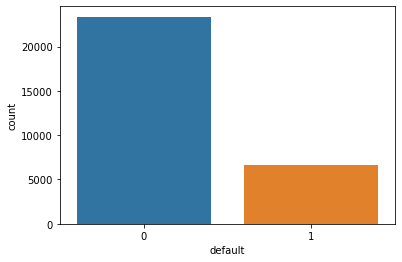

In [17]:
sns.countplot(data = df, x='default')
plt.show()

### Conclusion

Data is non equally distributed

Non defaulters are much more in number than defaulters

Will make it equally distributed using SMOTE

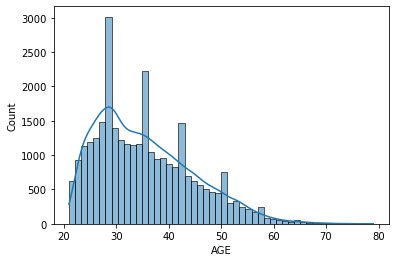

In [18]:
sns.histplot(df['AGE'],kde=True,bins=50)
plt.show()

Age group around 30 are higher in number

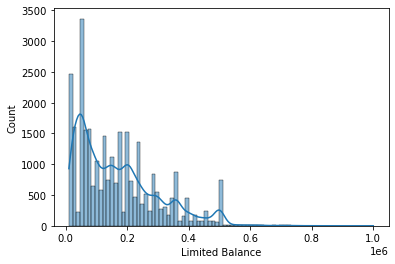

In [19]:
# Limited balance
sns.histplot(
    df['LIMIT_BAL'], kde=True
)
plt.xlabel('Limited Balance')
plt.show()

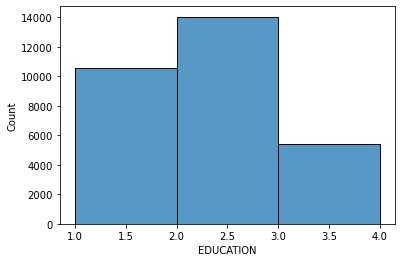

In [20]:
sns.histplot(df['EDUCATION'],binwidth=1)
plt.show()

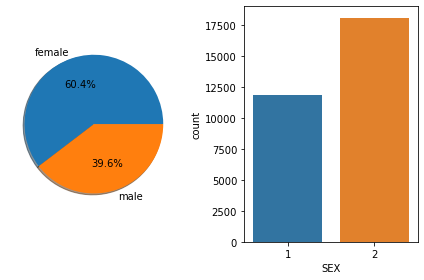

In [21]:
df['SEX'].value_counts()
labels = ['female','male']
values = df['SEX'].value_counts().values

fig, ax = plt.subplots(1,2)
ax[0].pie(values, labels = labels, autopct='%1.1f%%', shadow = True)
sns.countplot(
    data = df, x = 'SEX', ax=ax[1]
)
plt.tight_layout()
plt.show()

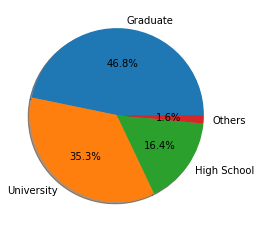

In [22]:
df['EDUCATION'].value_counts()
labels = ['Graduate','University','High School','Others']
values = df['EDUCATION'].value_counts().values

fig, ax = plt.subplots()
ax.pie(values, labels = labels, autopct='%1.1f%%', shadow = True)
plt.show()

## Outliers detection

In [23]:
# Categorical and continuous columns
categorical_columns = []
continuous_columns = []

for column in dataset.columns:
    if dataset[column].nunique() > 12:
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

In [24]:
print("Continuous columns : \n",continuous_columns)
categorical_columns.remove('default')
print("\nCategorical columns : \n",categorical_columns)

Continuous columns : 
 ['LIMIT_BAL', 'AGE', 'sept_bill', 'aug_bill', 'july_bill', 'june_bill', 'may_bill', 'april_bill', 'sept_prev_pay', 'aug_prev_pay', 'july_prev_pay', 'june_prev_pay', 'may_prev_pay', 'april_prev_pay']

Categorical columns : 
 ['SEX', 'EDUCATION', 'MARRIAGE', 'sept_repay_status', 'aug_repay_status', 'july_repay_status', 'june_repay_status', 'may_repay_status', 'april_repay_status']


### Bivariate Analysis
**Limited Balance vs Categorical columns**

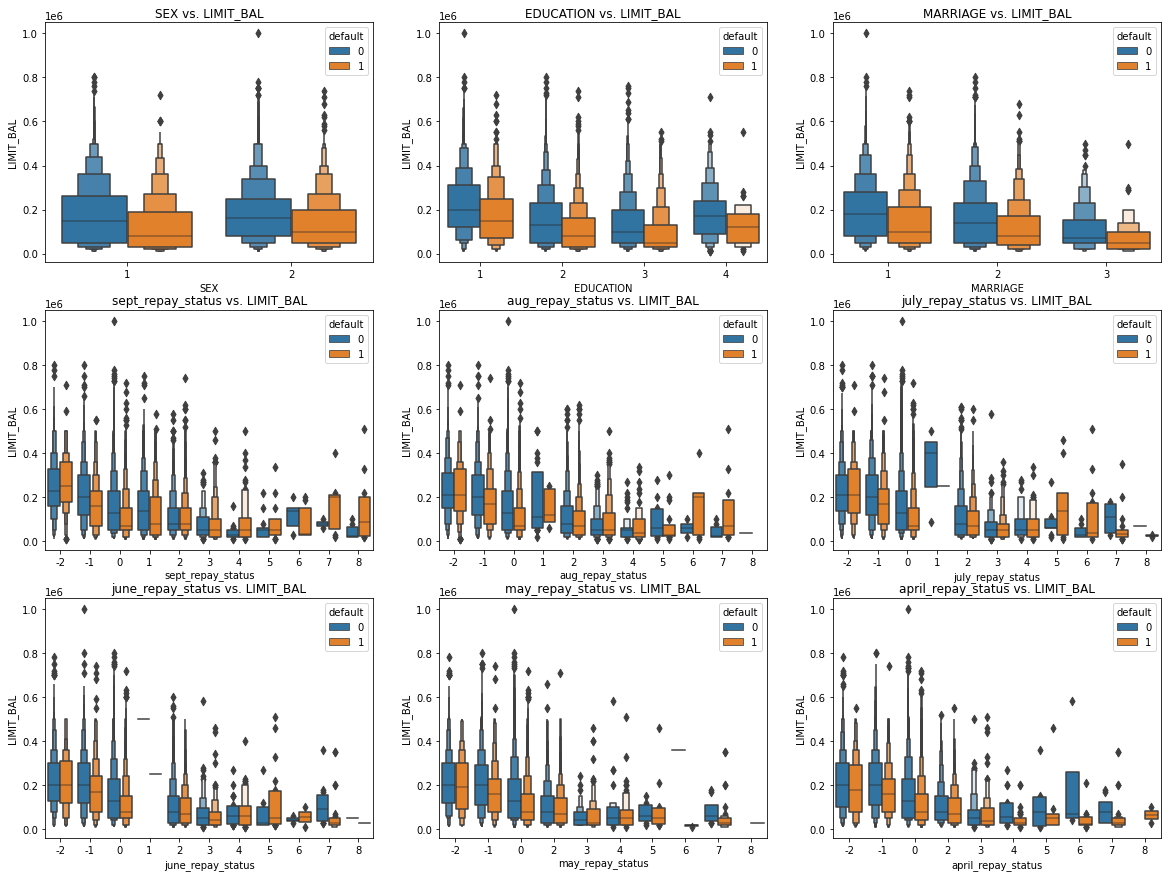

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, categorical_col in enumerate(categorical_columns):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    sns.boxenplot(data=df, y='LIMIT_BAL', x=categorical_col, hue='default', ax=ax)
    ax.set_title(f'{categorical_col} vs. LIMIT_BAL')

plt.show()

**Conclusion**

* Outliers Consideration: Many outliers are present in the dataset, and these outliers may hold valuable information for our model.
* Information Retention: **Removing these outliers may result in the loss of valuable information**, and careful consideration is required when deciding how to handle them in the modeling process.

**Age vs Categorical columns**

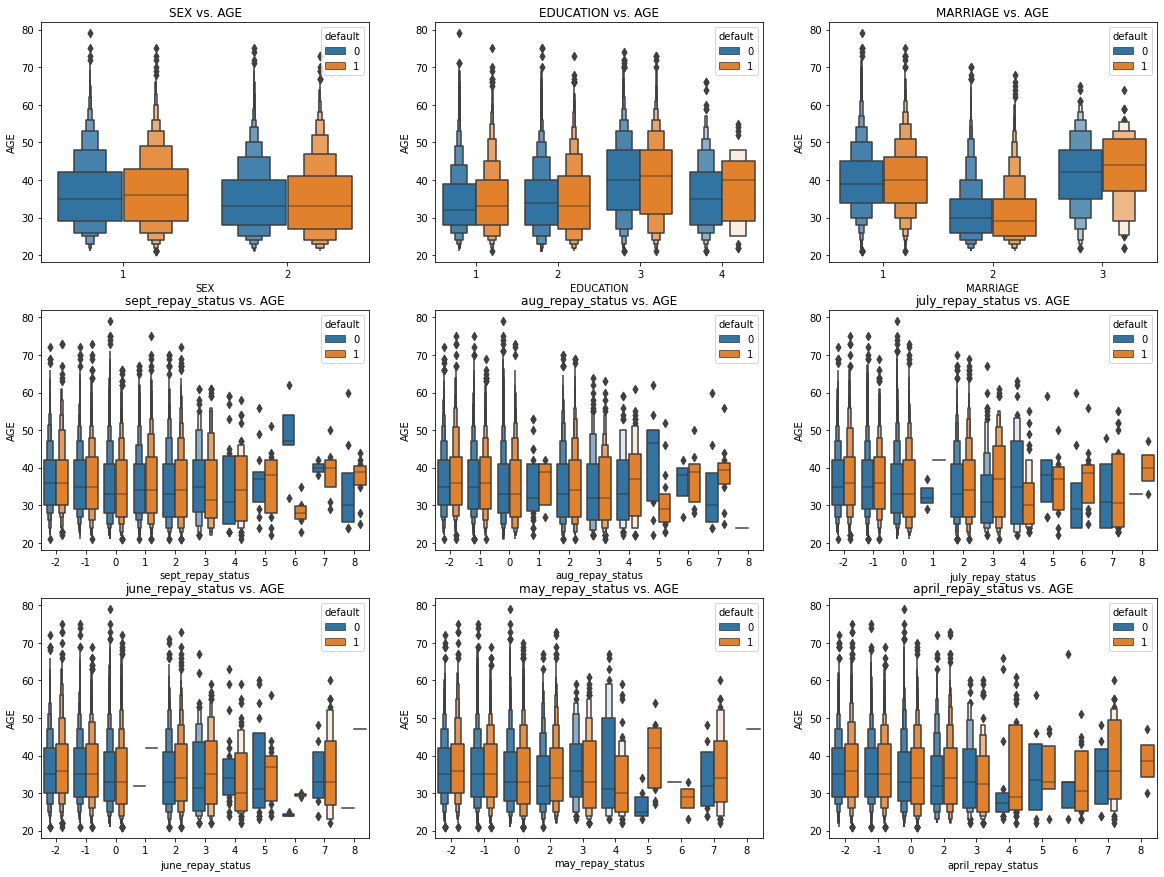

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, categorical_col in enumerate(categorical_columns):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    sns.boxenplot(data=df, y='AGE', x=categorical_col, hue='default', ax=ax)
    ax.set_title(f'{categorical_col} vs. AGE')

plt.show()

**Conclusion**

* Age Outliers: The feature "Age" also exhibits a similar number of outliers as observed in the limited balance.
* Future Approach: Our plan is to leave the "Age" feature as it is, considering the presence of outliers.

**Univariate analysis of Repayment status feature**

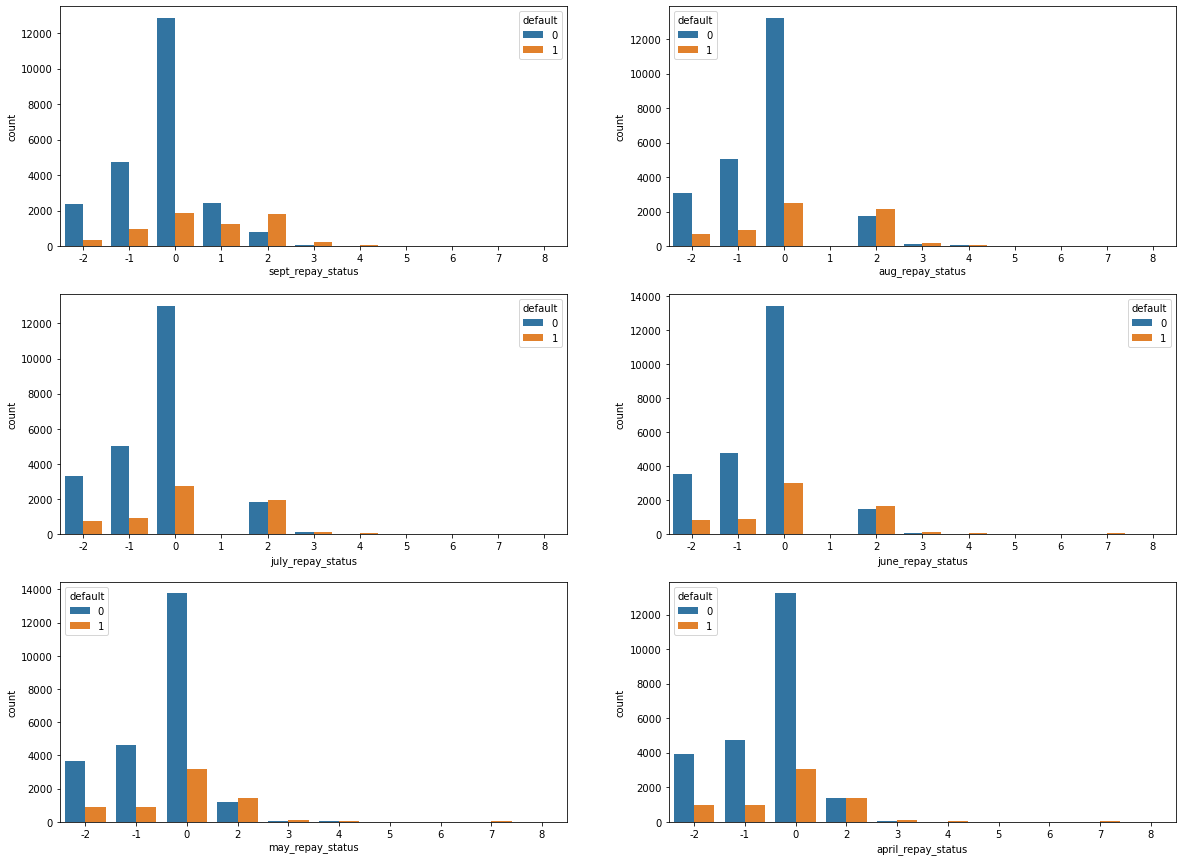

In [27]:
months_columns = df.loc[:,'sept_repay_status': 'april_repay_status'].columns
figure, axes = plt.subplots(3,2,figsize=(20,15))
for i,column in enumerate(months_columns):
    row , col = divmod(i,2)
    ax=axes[row,col]
    sns.countplot(data =df, x=column,hue='default',ax=ax)

**Interpretation**
* Usage of Revolving Credit: The dataset reveals that, irrespective of being a defaulter or non-defaulter, a significant number of users are engaged with revolving credit services.
* Defaulters with Revolving Credit: Notably, even among defaulters, a substantial number of individuals utilize revolving credit services.
* Rare Extended Delays: There are very few instances where users have delayed their payments for four months or more. This suggests that a vast majority of users tend to make timely payments

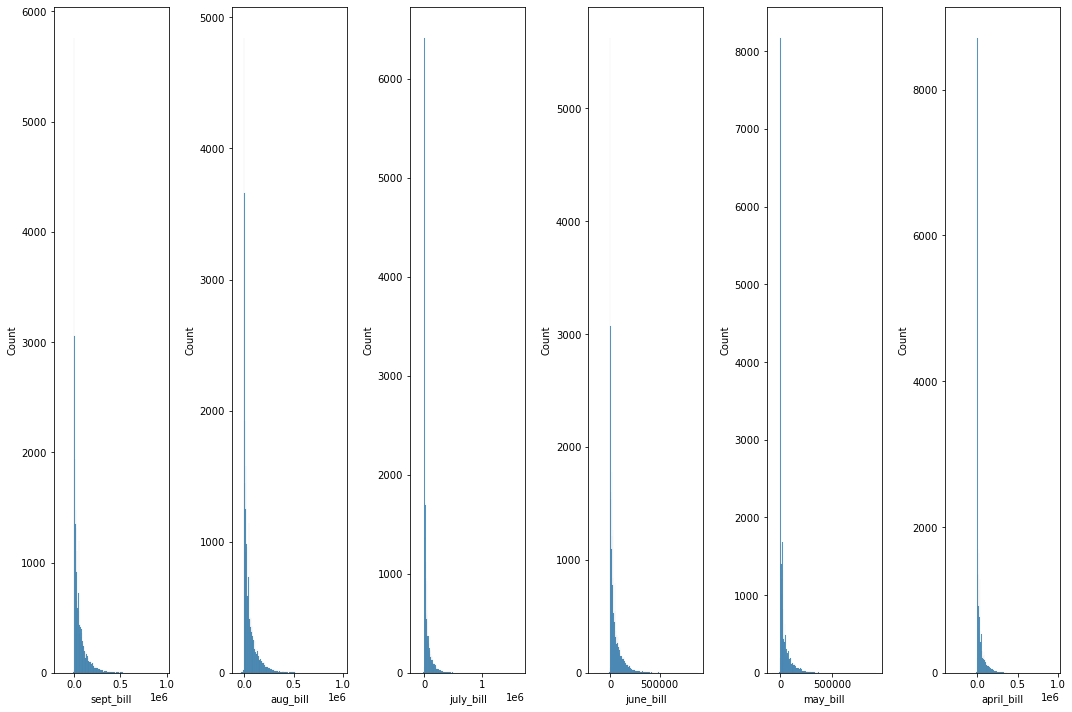

In [28]:
# previous bills analysis
Previous_bills = ['sept_bill', 'aug_bill', 'july_bill', 'june_bill', 'may_bill', 'april_bill']

fig, ax = plt.subplots(1,6, figsize=(15,10))

for i,bill_columns in enumerate(Previous_bills):
    sns.histplot(
        data = df, x = bill_columns,ax=ax[i]
    )
plt.tight_layout()

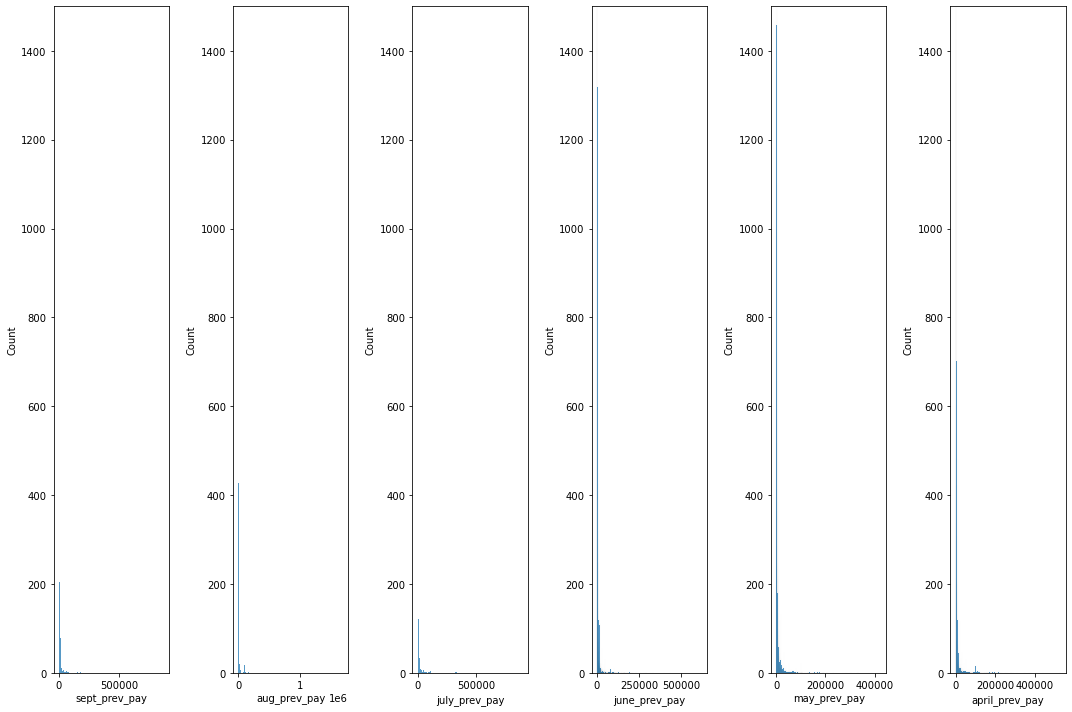

In [29]:
previous_payment_months = ['sept_prev_pay', 'aug_prev_pay', 'july_prev_pay', 'june_prev_pay', 'may_prev_pay', 'april_prev_pay']
# this list has dependency in cell of feature scaling
fig, ax = plt.subplots(1,6, figsize=(15,10))

for i,pay_columns in enumerate(previous_payment_months):
    sns.histplot(
        data = df, x = pay_columns,ax=ax[i]
    )
    ax[i].set_ylim(0, 1500)
plt.tight_layout()

### Conclusion
* Data is highly skewed towards zero
* It is better to make the data to distribute equally 

# Feature Engineering

### Handling Unbalanced dataset using SMOTE

In [30]:
# pip install imblearn

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
df_smote = dataset.copy()

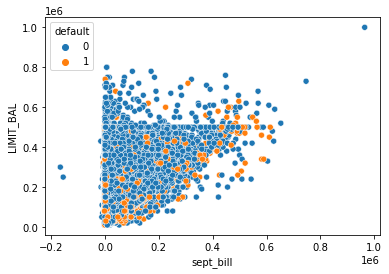

In [33]:
sns.scatterplot(data = df, x='sept_bill',y = 'LIMIT_BAL', hue= 'default')
plt.show()

In [34]:
print('Before Handling Unbalanced dataset :')
df['default'].value_counts()

Before Handling Unbalanced dataset :


0    23364
1     6636
Name: default, dtype: int64

**Interpretations**

* Non defaulters are outperforming in a very large number
* Need to balance the dataset by oversampling

In [35]:
oversample = SMOTE()
X_input , y_output = df_smote.iloc[:,:-1],df_smote[['default']]
X,y = oversample.fit_resample(X_input,y_output)

In [36]:
print(f'Shape of X {X.shape}')
print(f'Shape of y {y.shape}')
df_smote = pd.concat([X,y],axis=1)
print(f'Normal distributed dataset shape {df_smote.shape}')

Shape of X (46728, 23)
Shape of y (46728, 1)
Normal distributed dataset shape (46728, 24)


In [37]:
print('After Handling Unbalanced dataset :')
df_smote['default'].value_counts()

After Handling Unbalanced dataset :


1    23364
0    23364
Name: default, dtype: int64

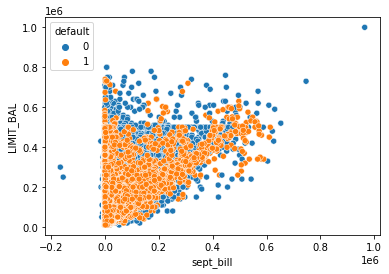

In [38]:
sns.scatterplot(data = df_smote, x='sept_bill',y = 'LIMIT_BAL',hue = 'default')
plt.show()

**Features Correlation**

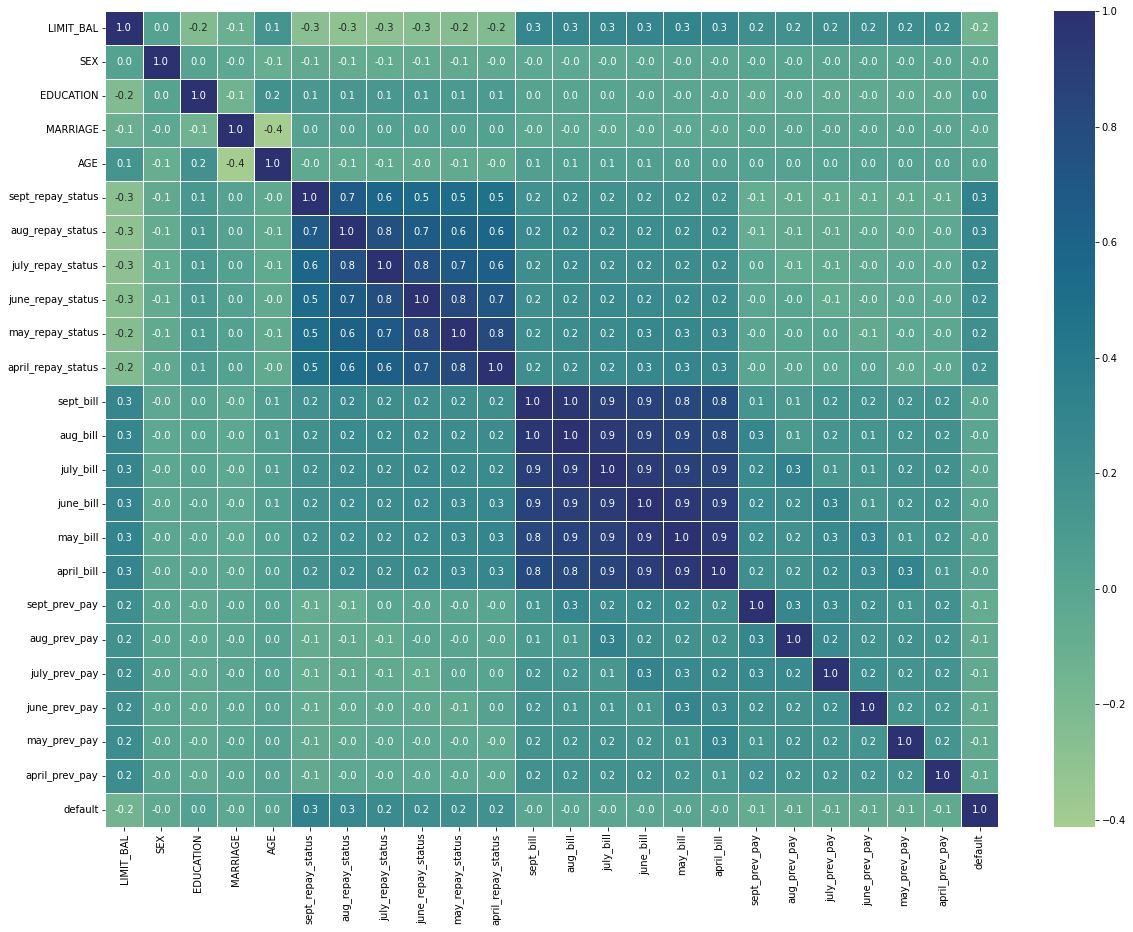

In [39]:
figure = plt.figure(figsize=(20,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '0.1f', linewidths=1,cmap='crest')

plt.show()

**Interpretations**

* Limited balance feature shows positive relation with bill statement in all the months
* Marriage and age shows highly negative correlation
* Previous months bill statements have highly positive relation with succeeding months
* Previous months bill repay status have highly positive relation with succeeding months

### **Let's try with and without Feature reduction**

In [40]:
df_smote.head(4)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_repay_status,aug_repay_status,july_repay_status,june_repay_status,may_repay_status,...,june_bill,may_bill,april_bill,sept_prev_pay,aug_prev_pay,july_prev_pay,june_prev_pay,may_prev_pay,april_prev_pay,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0


In [41]:
df_smote.shape

(46728, 24)

In [42]:
df_smote_reduced = df_smote.copy()

In [43]:
df_smote_reduced['Dues'] = df_smote['april_bill'] + df_smote['aug_bill'] + df_smote['july_bill'] + df_smote['june_bill'] + df_smote['may_bill'] + df_smote['sept_bill']

df_smote_reduced['Previous_payments'] = df_smote['april_prev_pay'] + df_smote['aug_prev_pay'] + df_smote['july_prev_pay'] + df_smote['june_prev_pay'] + df_smote['may_prev_pay'] + df_smote['sept_prev_pay']

In [44]:
df_smote_reduced.drop(['sept_bill','aug_bill','july_bill','june_bill','may_bill','april_bill','sept_prev_pay','aug_prev_pay','july_prev_pay','june_prev_pay','may_prev_pay','april_prev_pay'],axis=1, inplace=True)

Obtained datasets
* df_smote
* df_smote_reduced

## Endocing categorical type data

In [45]:
df_smote = pd.get_dummies(df_smote, columns=['SEX','MARRIAGE'], dtype=int)
df_smote_reduced = pd.get_dummies(df_smote_reduced, columns=['SEX', 'MARRIAGE'], dtype=int)

* Education column contains ordinal data, so no encoding required

**Now we have two datasets and we have to perform feature scaling on these datasets to get better results and also it reduces model complexity.**

* we have options like log transformation, minmax-scaling, l1,l2 normalization ,power transforms
* we are not considering log transformation as there are 0 values in the dataset

In [46]:
from sklearn.preprocessing import  MinMaxScaler, PowerTransformer, Normalizer


In [47]:
# MinMax Scaler

minmax_previous_month_payment_df = pd.DataFrame(index=df.index)

normalize= MinMaxScaler()

for column in previous_payment_months:
    column_name = 'MinMax_' + column
    normalize.fit(df[[column]])
    normalized_data = normalize.fit_transform(df[[column]])
    minmax_previous_month_payment_df[column_name] = normalized_data

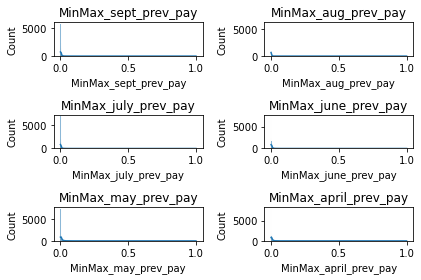

In [48]:
fig, ax = plt.subplots(3,2)
for axes,column in zip(ax.ravel(),minmax_previous_month_payment_df.columns):
    sns.histplot(
        data = minmax_previous_month_payment_df,x=column , kde=True, ax=axes
    )

    axes.set_title(f'{column}')
plt.tight_layout()

In [49]:
# Normalizer (L1) norm
l1_norm_transformed_previous_month_payment_df = pd.DataFrame(index=df.index)

normalize= Normalizer(norm='l1')

for column in previous_payment_months:
    l1_norm_column_name = 'l1_norm_' + column
    normalize.fit(df[[column]])
    normalized_data = normalize.fit_transform(df[[column]])
    l1_norm_transformed_previous_month_payment_df[l1_norm_column_name] = normalized_data

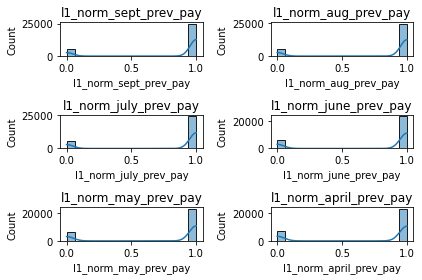

In [50]:
fig, ax = plt.subplots(3,2)
for axes,column in zip(ax.ravel(),l1_norm_transformed_previous_month_payment_df.columns):
    sns.histplot(
        data = l1_norm_transformed_previous_month_payment_df,x=column , kde=True, ax=axes
    )

    axes.set_title(f'{column}')

plt.tight_layout()

In [51]:
# Normalizer (L2) norm

l2_norm_transformed_previous_month_payment_df = pd.DataFrame(index=df.index)

normalize= Normalizer(norm='l2')

for column in previous_payment_months:
    l2_norm_column_name = 'l2_norm_' + column
    normalize.fit(df[[column]])
    normalized_data = normalize.fit_transform(df[[column]])
    l2_norm_transformed_previous_month_payment_df[l2_norm_column_name] = normalized_data


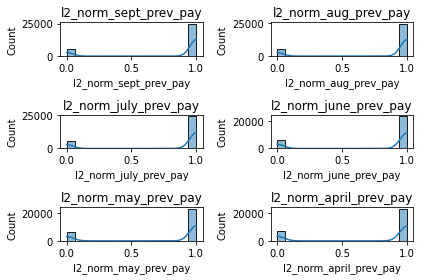

In [52]:
fig, ax = plt.subplots(3,2)
for axes,column in zip(ax.ravel(),l2_norm_transformed_previous_month_payment_df.columns):
    sns.histplot(
        data = l2_norm_transformed_previous_month_payment_df,x=column , kde=True, ax=axes
    )

    axes.set_title(f'{column}')

plt.tight_layout()


In [53]:
# YeoJohnson transformation

pt_yj = PowerTransformer(method="yeo-johnson",standardize=True)

yjohnson_transformed_previous_month_payment_df = pd.DataFrame(index=df.index)

for column in previous_payment_months:
    yjohnson_column_name = 'yjohnson_' + column
    pt_yj.fit(df[[column]])
    normalized_data = pt_yj.fit_transform(df[[column]])
    yjohnson_transformed_previous_month_payment_df[yjohnson_column_name] = normalized_data


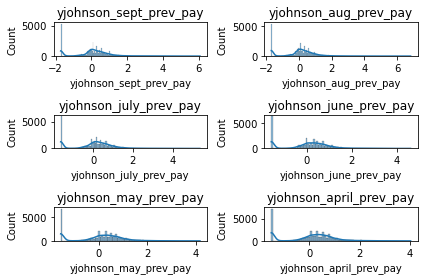

In [54]:
fig, ax = plt.subplots(3,2)
for axes,column in zip(ax.ravel(),yjohnson_transformed_previous_month_payment_df.columns):
    sns.histplot(
        data = yjohnson_transformed_previous_month_payment_df,x=column , kde=True, ax=axes
    )

    axes.set_title(f'{column}')

plt.tight_layout()

* Among all the techniques used, the Yeo-Johnson power transformer demonstrated superior performance in transforming the data to approximate a Gaussian distribution.

**Apply yeo-johnson power transformer on df_smote and df_smote_reduced dataset**

In [55]:
from sklearn.model_selection import train_test_split as tts

**Split the dataset and apply scaling on train set**

In [56]:
def applyFeatureScaling(train_df,test_df,column_names):
    normalize = PowerTransformer(method="yeo-johnson",standardize=True)
    
    scaled_train_df = train_df.copy()
    scaled_test_df = test_df.copy()
    for col in column_names:
        col_data_train = train_df[[col]].values.reshape(-1, 1)  # Reshape to 2D array
        col_data_test = test_df[[col]].values.reshape(-1, 1)  # Reshape to 2D array

        scaled_train_df[col] = normalize.fit_transform(col_data_train)
        scaled_test_df[col] = normalize.transform(col_data_test)

    return scaled_train_df, scaled_test_df


In [57]:
scaled_df_features = ['LIMIT_BAL','AGE','Dues','Previous_payments']
unscaled_df_features = ['LIMIT_BAL','AGE','sept_bill', 'aug_bill',
                        'july_bill', 'june_bill','may_bill', 'april_bill','sept_prev_pay',
                        'aug_prev_pay', 'july_prev_pay', 'june_prev_pay', 'may_prev_pay', 'april_prev_pay']

In [59]:
# for reduced dataset
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = tts(df_smote_reduced.drop(columns=['default'],axis=1),df_smote_reduced['default'],test_size=0.2,random_state=42)
X_train_reduced_scaled, X_test_reduced_scaled = applyFeatureScaling(X_train_reduced,X_test_reduced,scaled_df_features)

In [61]:
# for unreduced dataset
X_train_nonreduced, X_test_nonreduced, y_train_nonreduced, y_test_nonreduced = tts(df_smote.drop(columns=['default'],axis=1),df_smote['default'],test_size=0.2,random_state=42)
X_train_nonreduced_scaled, X_test_nonreduced_scaled = applyFeatureScaling(X_train_nonreduced,X_test_nonreduced,unscaled_df_features)

**Now we have four different datasets**
* X_train_reduced
* X_train_nonreduced
* X_train_reduced_scaled
* X_train_nonreduced_scaled

Conduct classification on these four datasets and determine on which type of dataset the model performs most effectively.

# Model Building

* We'll explore all the models using the obtained four datasets and aim is to identify the best-performing model.

In [62]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [67]:
from sklearn.calibration import  calibration_curve,CalibrationDisplay
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [64]:
# algorithms 
svc = SVC()
dtc = DecisionTreeClassifier()
rfclf = RandomForestClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()
ada_boost = AdaBoostClassifier()

classifiers  = {
    'SupportVectorMachine' : svc,
    'DecisionTreeClassifier' : dtc,
    'AdaboostClassifier': ada_boost,
    'RandomForestClassifier' : rfclf,
    'KNeighborsClassifier' : knn,
    'LogisticRegression' :lr,
    'XGBClassifier' : xgb
}

In [68]:
def best_model_selection(X_train,X_test,y_train,y_test,AUC=False, calibration_curve=False):
    algorithms = []
    mse_test =[]
    accuracy_on_test=[]
    accuracy_on_train = []

    for obj, model in classifiers.items():
        algorithms.append(obj)
        model.fit(X_train,y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        accuracy_on_train.append(accuracy_score(y_train,train_pred))
        accuracy_on_test.append(accuracy_score(y_test, test_pred))
        mse_test.append(mean_squared_error(y_test,test_pred))
    score_data = {
        'Algorithm' : algorithms,
        'Accuracy(Train)' : accuracy_on_train,
        'Accurcy(Test)' : accuracy_on_test,
        'Test accuracy(MSE)' : mse_test,
    }
    score_df = pd.DataFrame(score_data)
    return score_df

In [69]:
# reduced and non-scaled dataset
score_df_reduced = best_model_selection(X_train_reduced,X_test_reduced,y_train_reduced,y_test_reduced)
score_df_reduced

,Algorithm,Accuracy(Train),Accurcy(Test),Test accuracy(MSE)
0,SupportVectorMachine,0.618854,0.607533,0.392467
1,DecisionTreeClassifier,0.999358,0.746523,0.253477
2,AdaboostClassifier,0.751030,0.750267,0.249733
3,RandomForestClassifier,0.999304,0.815322,0.184678
4,KNeighborsClassifier,0.778182,0.662743,0.337257
5,LogisticRegression,0.556632,0.557886,0.442114
6,XGBClassifier,0.855305,0.805264,0.194736


In [70]:
# non-reduced and non-scaled dataset
score_df_nonreduced = best_model_selection(X_train_nonreduced,X_test_nonreduced,y_train_nonreduced,y_test_nonreduced)
score_df_nonreduced

,Algorithm,Accuracy(Train),Accurcy(Test),Test accuracy(MSE)
0,SupportVectorMachine,0.627388,0.616948,0.383052
1,DecisionTreeClassifier,0.999358,0.754547,0.245453
2,AdaboostClassifier,0.755578,0.751230,0.248770
3,RandomForestClassifier,0.999358,0.835331,0.164669
4,KNeighborsClassifier,0.836606,0.742885,0.257115
5,LogisticRegression,0.586994,0.586775,0.413225
6,XGBClassifier,0.899631,0.826022,0.173978


In [ ]:
# reduced and scaled dataset
score_df_reduced_scaled = best_model_selection(X_train_reduced_scaled,X_test_reduced_scaled,y_train_reduced,y_test_reduced)
score_df_reduced_scaled

In [ ]:
# non-reduced and scaled dataset
score_df_nonreduced_scaled = best_model_selection(X_train_nonreduced_scaled,X_test_nonreduced_scaled,y_train_nonreduced,y_test_nonreduced)
score_df_nonreduced_scaled

* From the above results XGBClassifier is performing well on both training and testing datasets
* Let's try to explore more using XGBClassifier

**Note**
* We are not considering the RandomForestClassifier model because it performs exceptionally well on the training data but demonstrates a decrease in effectiveness on the testing data, indicating a potential issue with overfitting.

In [ ]:
model = XGBClassifier()
model.fit(X_train_nonreduced_scaled,y_train_nonreduced)

# Model Evaluation

In [ ]:
result = model.predict(X_test_nonreduced_scaled)

In [ ]:
result_prob = model.predict_proba(X_test_nonreduced_scaled)[:,1]

In [ ]:
accuracy_score(y_test_nonreduced,result)

In [ ]:
cm = confusion_matrix(y_test_nonreduced, result)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification report : ")
print(classification_report(y_test_nonreduced,result))

In [ ]:
fpr1, tpr1, thresholds = roc_curve(y_test_nonreduced,result)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr1, tpr1, label='ROC curve (Predicted Class Labels)')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve based on Predicted Class Labels')
plt.legend()
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_nonreduced,result_prob)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label='ROC curve (Predicted Probabilities)')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve based on Predicted Probabilities')
plt.legend()
plt.show()

**Interpretation**
* From the above Receiver Operating Characteristic Curve predicted probabilities curve is closer to left-top corner than the Random classifier line.
* This suggests that the model has a high ability to distinguish between positive and negative classes across different thresholds.

In [ ]:
# area under the ROC curve
# model performance depence on as high the auc value close to 1.
print("Area under the ROC curve : ",auc(fpr,tpr))

**Conclusion**
* Area under the roc curve is also good (0.9) which is close to 1
* Hence we can conclude that,
* Xtreme Gradient Boosting Classifier is perfoming better in classifying the data points